# I've been playing a lot of Animal Crossing: New Horizons lately.
<img style="float:left; padding-right: 35px;" src="https://cdn.mobilesyrup.com/wp-content/uploads/2020/03/animal-crossing-fishing-gif.gif">
<br><br>

<p style="font-size: large;">One of the core activities in the game is fishing.</p> It's simple enough: you find a dark silhouette in any of the numerous water sources on your island, toss your fishing rod, and wait for the fish to boop the bobber. Only, when the fish does bite, it doesn't always sink the bobber right away. In order to catch the fish, you have to wait for the fishhook to sink, which can happen anywhere from the first to the fifth boop.

## If you were able to predict beforehand how many "boops" it might take to get a solid bite, fishing would suddenly become a whole lot easier.
<p style="font-size: large;">So I decided to investigate the correlation between boop-count and several other in-game factors. It's time to put on my detective hat and get fishing!</p> [image of me wearing that detective hat in game that im too lazy to import rn]

#### Let's get some basics set up first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

FILEPATH = "../datasets/feesh.csv"

df = pd.read_csv(FILEPATH, index_col=0)

sns.set(style="white", context="notebook", palette="deep")
colors = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]
sns.set_palette(palette=colors, n_colors=4)

# What exactly's in this "feesh.csv" file we just imported?
<p style="font-size: large;">To gather evidence for this study, I caught 200 fish over the course of a few days in April.</p> I caught every fish that I saw, so that any favoritism based on conditions or size would not skew the data. For each fish, I recorded the information described below. Since I collected the data myself, I can personally attest that there should not be any unfilled columns for any of the rows, and no cleansing should be necessary. However, adding additional, specialized columns might prove helpful.

The dataset contains 7 relevant columns: <strong>Fish, Boops, Size, Time, Location, Weather, and Value.</strong>
### Fish
This is the name of the fish (or similar creature) that was caught. Animal Crossing has 80 unique kinds of "fish," plus various other trash items that can be caught. In-game, fish-adjacent creatures such as snapping turtles and frogs are treated the same as fish, and thus will be considered fish for the purposes of this analysis. 
### Boops
As explained previously, a fish "boops" the fish hook between 1 and 5 times before sinking it. The connections between this number and external variables such as value and weather, if any, will be the primary subject of investigation. 
### Size
A fish appears in the water as a silhouette before it is caught. These shadows range in size from extra small to extra large. There is, in fact, a size above extra large, but fish of that size are extremely rare and were not encountered during this study. The size of the fish's silhouette is reliably determined by the species of fish. A sea bass, for example, will always appear as an extra large shadow. 
### Time
Certain fish can only be caught at certain times of the day, or certain times of the year. Though it is not apparant from the dataset, all fish were caught during the month of April. Times are recorded in 24-hour time notation.
### Location
Fish of certain kinds are only available in certain locations. Though there is some overlap (a clifftop river, for example, can host all of the same fish as a normal river, along with fish unique to that location), there is a clear divide between freshwater fish (found in ponds and all river varieties) and saltwater fish (found in the sea and off the pier). Trash can be found everywhere that fish can be. 
### Weather
Some fish are only available in certain weather, such as rain. There is also a general assumption among players that rarer fish appear more commonly in the rain, though I have not been able to find concrete evidence of this online. I will attempt to investigate this with my limited dataset, but dividing the data by weather is likely to create unreasonably small (and therefore unreliable) subsets of data. 
### Value
Though players often refer to "rare" fish, there is no codified method of determining fish rariy. I have decided that the closest approximation for rarity, without knowing the in-game spawn probabilities for each fish, is value; that is, the number of bells (currency) they can be sold for at the standard general store. I will use these numbers to create rarity categories, which I will expand on later. 

## Let's take a glance at the dataframe:

In [2]:
df

,Fish,Boops,Size,Time,Location,Weather,Value
ID,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500
2,guppy,5,x small,11:17,river,clear,1300
3,sea horse,5,x small,11:24,sea,clear,1100
4,olive flounder,4,large,11:25,sea,clear,800
5,bluegill,3,small,11:27,river,clear,180
...,...,...,...,...,...,...,...
196,stone,3,small,21:48,sea,clear,75
197,tadpole,2,x small,21:49,sea,clear,100
198,dab,2,medium,21:50,sea,clear,300


## What about boops?
Fishing in Animal Crossing ultimately comes down to timing. Without any indication of when the fishhook will sink, catching a fish is purely reactionary. As soon as the fish bites, you have to quickly press 'A' to reel it in. Otherwise, it will slip off your hook and swim away. Beyond that, there isn't much strategy. However, a better understanding of the probabilities behind fishing could add more strategy to what otherwise would be a game of reflexes. <p style="font-size: large;">If I can look at a fish's shadow and know from environmental conditions that it is most likely to sink the fishook on, for example, the third boop, I would be able to plan my timing accordingly.</p>
## What can we use this data for?
<p style="font-size: large;">Well, lots of things!</p> We primarily want to investigate boop-count, but we can also see where certain fish appear, or dial-in on certain aspects of fishing. To demonstrate how we can use this set to look at more specific categories, let's take a look at only the Red Snappers I caught.

In [3]:
df.loc[df['Fish'] == 'red snapper']

,Fish,Boops,Size,Time,Location,Weather,Value
ID,,,,,,,
17,red snapper,1,large,11:48,sea,clear,3000
23,red snapper,3,large,12:00,sea,clear,3000
35,red snapper,2,large,13:15,sea,clear,3000
60,red snapper,1,large,14:01,sea,rain,3000
67,red snapper,1,large,14:22,sea,rain,3000
109,red snapper,3,large,2:49,sea,clear,3000
124,red snapper,1,large,15:17,pier,clear,3000
125,red snapper,1,large,15:18,sea,clear,3000
147,red snapper,4,large,15:52,sea,clear,3000


Easy enough! I can see from this that I caught 11 Red Snappers. They all have the same value, size, and are from saltwater locations—as expected.

In fact, let's create another column to sort by saltwater or freshwater locations. This can give us a better understanding of species frequency. We'll call it "Water Type" and it will have two options: "saltwater" or "freshwater".

In [4]:
def _water_type(data):
    if data == "river" or data == "river mouth" or data == "clifftop river" or data == "pond":
        return "freshwater"
    elif data == "sea" or data == "pier":
        return "saltwater"
    else:
        return "ERROR"  # this shouldn't happen! hopefully...

df["Water Type"] = df["Location"].apply(_water_type)
df.head()

,Fish,Boops,Size,Time,Location,Weather,Value,Water Type
ID,,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500,saltwater
2,guppy,5,x small,11:17,river,clear,1300,freshwater
3,sea horse,5,x small,11:24,sea,clear,1100,saltwater
4,olive flounder,4,large,11:25,sea,clear,800,saltwater
5,bluegill,3,small,11:27,river,clear,180,freshwater


Great! Let's make sure none of those water types met the error condition:

In [5]:
df.loc[df['Water Type'] == 'ERROR'].count()

Fish          0
Boops         0
Size          0
Time          0
Location      0
Weather       0
Value         0
Water Type    0
dtype: int64

Good to go. Now we can easily, for instance, separate all the saltwater fish! 

In [6]:
df.loc[df['Water Type'] == 'saltwater'].head()

,Fish,Boops,Size,Time,Location,Weather,Value,Water Type
ID,,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500,saltwater
3,sea horse,5,x small,11:24,sea,clear,1100,saltwater
4,olive flounder,4,large,11:25,sea,clear,800,saltwater
6,sea bass,2,x large,11:30,sea,clear,400,saltwater
7,olive flounder,1,large,11:31,sea,clear,800,saltwater


We don't need that quite yet, but it'll come up again later. 
## What we really want to focus on right now is boops. Is it really random?
Let's take a preliminary look with a bar graph of all 200 catches. We can use a handy histogram function that might look familiar from earlier in this class!

<BarContainer object of 5 artists>

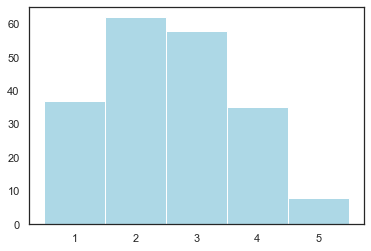

In [7]:
def custom_hist(ls, interval):
    hist_ls_dict = dict()
    ls = sorted(ls)
    min_ls = np.min(ls)
    max_ls = np.max(ls)
    
    current_min = int(np.floor(min_ls))
    current_max = current_min + interval
    
    for j in ls:
        while j >= current_max:
            current_min = current_max
            current_max += interval
        hist_ls_dict[current_min] = hist_ls_dict.get(current_min, 0) + 1 
    return hist_ls_dict

hist_dict = custom_hist(df['Boops'].values, 1)
plt.bar(hist_dict.keys(), hist_dict.values(), 1, color='lightblue')

### That certainly doesn't look random!
In fact, at a glance it appears to resemble a right-skewed distribution. Let's use a countplot to see if saltwater and freshwater fish have the same distribution.

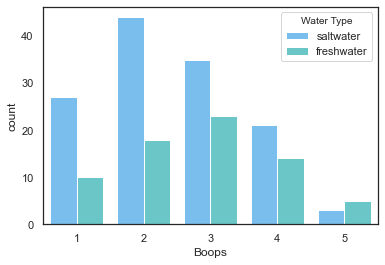

In [8]:
plt.show(sns.countplot("Boops", hue="Water Type", data=df))

#### They do seem to follow the same general spread. That brings us to our first question:
## Do boops relate to the location of the fish?
The dataset contains 130 saltwater and 70 freshwater catches. Why don't we make a couple violin plots to separate out those two categories and view boops-by-water-type?

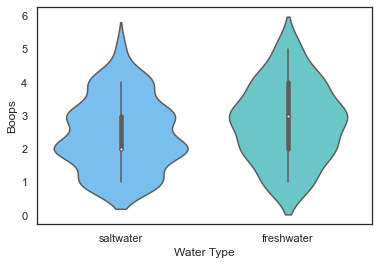

In [9]:
sns.violinplot(x="Water Type", y="Boops", data=df)

That also looks like both water types have similar shapes. But we shouldn't just go by what it <i>looks</i> like is going on—let's use a z-test to get a quantifiable measure of statistical significance. This function might look familiar from our class on Hypothesis Testing, with some modifications:

In [10]:
def accept_or_reject_null_hypothesis(population, sample, significant_level):
    # From the general population, calculate the mean:
    population_mean = np.array(population.values).mean()
    # And for the sample:
    sample_mean = np.array(sample.values).mean()
    # Now calculate the SD for the population. We'll implement this function next:
    sigma = calc_std(population)
    # N is the len of sample
    N = sample.values.size
    # Calculate standard deviation of the sample
    sample_std = calc_std(sample)

    # Calculate z-score from population mean (mu), sample mean and sample std
    z = (sample_mean - population_mean) / sample_std / np.sqrt(N)

    # Calculate p-value from z-score
    p_value = 2 * norm.cdf(-np.abs(z))

    # Determine whether to accept or reject null hypothesis
    if p_value < significant_level:
        print('Reject null hypothesis. P-value is {}, calculated from z-value {}'.format(p_value, z))
    else:
        print('Accept null hypothesis. P-value is {}, calculated from z-value {}'.format(p_value, z))
        
# And to calculate standard deviation:
def calc_std(population):
    # Make an array from the population values
    arr = np.array(population.values)
    # Calculate the mean
    mean = arr.mean()
    # Make a new empty list to hold the (value - mean)^2
    arr_2 = []
    for num in arr:
        arr_2.append(np.square(num - mean))
    # Standard deviation is the square root of the mean of arr_2
    return np.sqrt(np.array(arr_2).mean())

If we set everything up right, we should just be able to toss in our two groups. Fingers crossed! We'll also set the significance level at .05, which is generally considered solid.

In [11]:
# We'll consider saltwater to be the general population, since it's the larger of the two.
saltwater = df.loc[df['Water Type'] == 'saltwater']['Boops']
freshwater = df.loc[df['Water Type'] == 'freshwater']['Boops']
accept_or_reject_null_hypothesis(saltwater, freshwater, 0.05)

Accept null hypothesis. P-value is 0.9707632177592345, calculated from z-value 0.036651076432583043


### Yep! That's pretty solid evidence for boop-count being entirely unrelated to water-type.
How about fish size though? 
## Can fish size predict boop-count?
How about a nice countplot to get started:

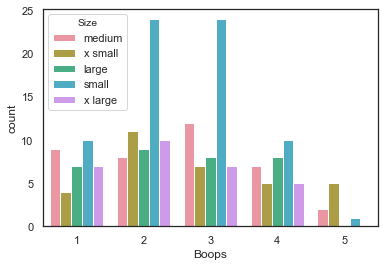

In [12]:
plt.show(sns.countplot("Boops", hue="Size", data=df))

It's hard to tell much of anything without the data being normalized. But we already have a nice set of functions for deciding whether a variable is relevant. Let's try getting the P value with, say, <i>x small</i> fish as the sample and the other sizes as the general population.

In [13]:
small = df.loc[df['Size'] == 'x small']['Boops']
not_small = df.loc[df['Size'] != 'x small']['Boops']
accept_or_reject_null_hypothesis(small, not_small, 0.05)

Accept null hypothesis. P-value is 0.9791051883544115, calculated from z-value -0.026190756807231014


Yep, it's looking like size is irrelevant too. Bummer. For good measure, lets run through each size and calculate their P-values. 

In [14]:
def many_null_hypothesis(column_one, categories, column_two):
    for cat in categories:
        print(cat.capitalize() + ":")
        yes_cat = df.loc[df[column_one] == cat][column_two]
        not_cat = df.loc[df[column_one] != cat][column_two]
        accept_or_reject_null_hypothesis(yes_cat, not_cat, 0.05)
        print("\n")

many_null_hypothesis('Size', ['x small', 'small', 'medium', 'large', 'x large'], 'Boops')

X small:
Accept null hypothesis. P-value is 0.9791051883544115, calculated from z-value -0.026190756807231014


Small:
Accept null hypothesis. P-value is 0.9964559256712004, calculated from z-value 0.004441853066275082


Medium:
Accept null hypothesis. P-value is 0.9978244192586553, calculated from z-value -0.002726689478742829


Large:
Accept null hypothesis. P-value is 0.9970821148025378, calculated from z-value 0.003657034920499233


X large:
Accept null hypothesis. P-value is 0.985126210596339, calculated from z-value 0.01864261034240404




### Looks like we're universally accepting the null hypothesis here. Size cannot predict boop-count.

We've spent some time looking at predictors of boop-count. Now let's ask what boops can predict!
## Do boops relate to the rarity of the fish?
Let's make a quick scatterplot with all the fish and their values. While rarity and value are not necessarily equivalent, value will make an adequate substitute. 

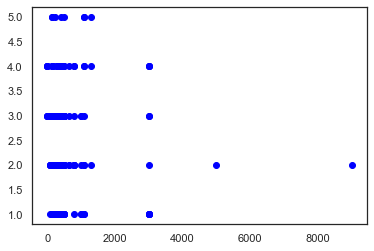

In [15]:
plt.plot(df['Value'], df['Boops'], 'o', color='blue')

There's not a whole lot of information to be gleaned from this view, and it's easy to see why; common fish are just that—more common. Also, price doesn't really scale linearly in Animal Crossing, so the data ends up needlessly clumped. To investigate this further, let's make some rarity categories for fish based on value. We'll use the following, non-linear rarity scale:

<strong>\< 100:</strong> Trash

<strong>\[100, 400):</strong> Common

<strong>\[400, 1300):</strong> Uncommon

<strong>\[1300, 4000):</strong> Rare

<strong>\> 4000:</strong> Very rare

First, let's create a new category: Rarity

In [16]:
BINS = [0, 100, 400, 1300, 4000, np.inf]
LABELS = ['Trash', 'Common', 'Uncommon', 'Rare', 'Very rare']

df['Rarity'] = pd.cut(df['Value'], BINS, include_lowest=True, labels=LABELS)
df.head()

,Fish,Boops,Size,Time,Location,Weather,Value,Water Type,Rarity
ID,,,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500,saltwater,Uncommon
2,guppy,5,x small,11:17,river,clear,1300,freshwater,Uncommon
3,sea horse,5,x small,11:24,sea,clear,1100,saltwater,Uncommon
4,olive flounder,4,large,11:25,sea,clear,800,saltwater,Uncommon
5,bluegill,3,small,11:27,river,clear,180,freshwater,Common


What does the dataspread look like for that new category? A quick countplot can give us a basic idea, and reaffirm that the bins are reasonable. 

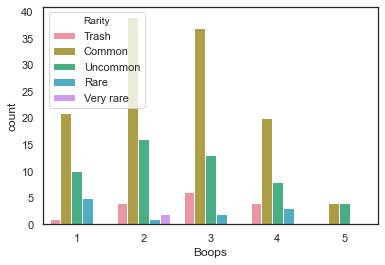

In [17]:
plt.show(sns.countplot("Boops", hue="Rarity", data=df))

Looks good. The differing quantities make proportions a little difficult to visualize, though. A set of pie charts might be easier to visualize.

In [18]:
df_boops = df.loc[df['Boops'] == 1]
df_boops['Rarity'].value_counts()

Common       21
Uncommon     10
Rare          5
Trash         1
Very rare     0
Name: Rarity, dtype: int64

Text(0.5, 1.0, 'Five Boops\n')

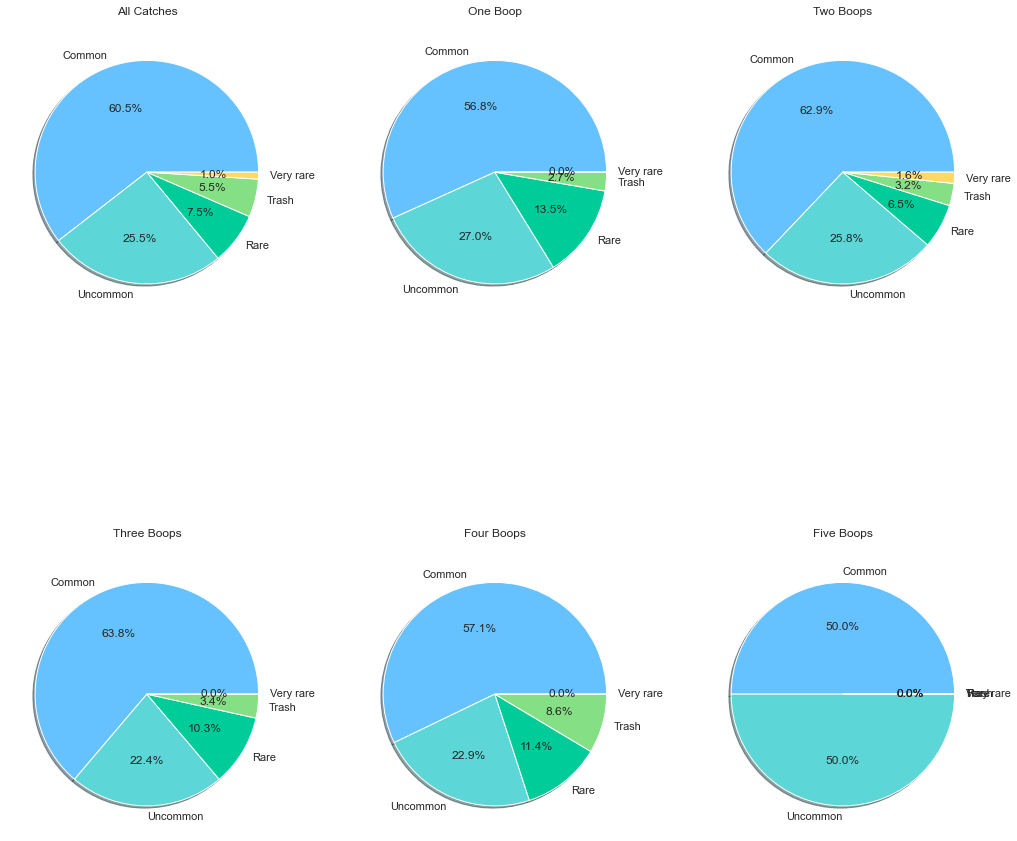

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
fig.tight_layout(pad=3.0)
LABELS = ['Common', 'Uncommon', 'Rare', 'Trash', 'Very rare']

rarity_df = df["Rarity"].value_counts()
axs[0,0].pie(rarity_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0,0].set_title("All Catches\n")
centre_circle = plt.Circle((0,0),0.75, color='black', fc='white', linewidth=1.25)

df_boops = df.loc[df['Boops'] == 1]
rarity_df = df_boops['Rarity'].value_counts()
axs[0,1].pie(rarity_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0,1].set_title("One Boop\n")

df_boops = df.loc[df['Boops'] == 2]
rarity_df = df_boops['Rarity'].value_counts()
axs[0,2].pie(rarity_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0,2].set_title("Two Boops\n")

df_boops = df.loc[df['Boops'] == 3]
rarity_df = df_boops['Rarity'].value_counts()
axs[1,0].pie(rarity_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1,0].set_title("Three Boops\n")

df_boops = df.loc[df['Boops'] == 4]
rarity_df = df_boops['Rarity'].value_counts()
axs[1,1].pie(rarity_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1,1].set_title("Four Boops\n")

df_boops = df.loc[df['Boops'] == 5]
rarity_df = df_boops['Rarity'].value_counts()
axs[1,2].pie(rarity_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1,2].set_title("Five Boops\n")

I'm ready to make the call that boop-count can't predict rarity, but we already have some nice functions set up to confirm that. Let's take advantage of them now.

In [20]:
many_null_hypothesis('Rarity', LABELS, 'Boops')

Common:
Accept null hypothesis. P-value is 0.9974345459773634, calculated from z-value 0.003215325335370245


Uncommon:
Accept null hypothesis. P-value is 0.9972914194072017, calculated from z-value -0.0033947088691327508


Rare:
Accept null hypothesis. P-value is 0.9828580630539959, calculated from z-value 0.0214858849365608


Trash:
Accept null hypothesis. P-value is 0.9833308773230994, calculated from z-value -0.02089316707105468


Very rare:
Accept null hypothesis. P-value is 0.9701064029384455, calculated from z-value 0.03747483734691557




### It's official: Boop count cannot predict rarity. 
At this point, I'm about ready to move on from boops entirely. Since we took the time to make rarity categories, though, let's see if size and rarity are linked. That would also be useful in-game: we can ignore silhouettes that are more likely to be common. 
## Are size and rarity related?
We can start with a simple chart of frequencies:

In [21]:
pd.crosstab(df["Size"], df["Rarity"])

Rarity,Trash,Common,Uncommon,Rare,Very rare
Size,,,,,
large,1,12,8,11,0
medium,3,18,16,0,1
small,9,55,5,0,0
x large,0,28,0,0,1
x small,2,8,22,0,0


Let's go ahead and normalize that data so we can compare it better:

In [22]:
pd.crosstab(df["Size"], df["Rarity"], normalize='columns')

Rarity,Trash,Common,Uncommon,Rare,Very rare
Size,,,,,
large,0.066667,0.099174,0.156863,1.0,0.0
medium,0.200000,0.148760,0.313725,0.0,0.5
small,0.600000,0.454545,0.098039,0.0,0.0
x large,0.000000,0.231405,0.000000,0.0,0.5
x small,0.133333,0.066116,0.431373,0.0,0.0


That's better, but still hard to visualize. This seems like a good time to pull out a heatmap! We'll be able to see if any cells show distictly higher density than the others.

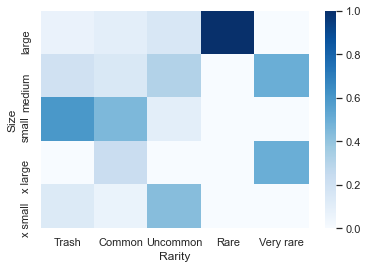

In [23]:
plt.show(sns.heatmap(pd.crosstab(df["Size"], df["Rarity"], normalize='columns'), cmap="Blues"))

Interesting! Looks like, for fish at least, bigger really <i>is</i> better.

## Finally, let's see if the meme has any merit behind it: are sea bass really the worst?

<img src="https://static2.thegamerimages.com/wordpress/wp-content/uploads/2020/04/seabass-meme.jpg?q=50&fit=crop&w=740&h=465">

Players like to lament that the sea bass is annoyingly common. But how common is it? What percentage of saltwater fish are actually sea bass?

In [24]:
# Separate the saltwater fish:
saltwater_fish = df.loc[df['Water Type'] == 'saltwater']

# What percent of those are sea bass?
saltwater_fish.loc[saltwater_fish['Fish'] == 'sea bass']['Fish'].size / saltwater_fish['Fish'].size

0.2153846153846154

Wow! 21% is certainly significant. But are sea bass the <i>most</i> common?

In [25]:
saltwater_fish['Fish'].value_counts()

sea bass            28
horse mackerel      23
dab                 14
red snapper         11
zebra turkeyfish    10
sea horse            9
olive flounder       8
squid                6
stone                5
clown fish           4
butterfly fish       3
anchovy              2
surgeonfish          2
barred knifejaw      1
oarfish              1
empty can            1
tadpole              1
old tire             1
Name: Fish, dtype: int64

### Okay, I'll relent: sea bass are the worst. 
Sea bass were the most common ocean fish, with 5 more instances than the runner up (horse mackerel). Combine that with the fact that they're disappointingly common for an x large shadow, the community resentment is understandable. I guess I should've put more faith in the memes! 

<img src="https://66.media.tumblr.com/6ece723564e98c135fd108fb9f26e14a/b267bc8ce9107fe1-bf/s640x960/03f9d03b940162ab46c27c044ffc5d9c9b6fb6eb.jpg">